In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Decision Tree Methods to Implement

1) Dtree with default parameters
2) Dtree with Manual parameter 
3) Dtree with hyper-parameter tunning ( Grid-search )
3) Dtree with bagging technique
4) Dtree with boosting technique
5) Dtree with voting technique
6) Dtree with Pruning

In [4]:
data = pd.read_csv('cleaned.csv')

In [5]:
data.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width',
       'Species'],
      dtype='object')

In [6]:
features = ['Sepal_length','Sepal_width','Petal_length','Petal_width']
target = ['Species']
target_names = data['Species'].unique()

X = data[features]
Y = data[target]

In [7]:
from sklearn.preprocessing import LabelEncoder

labels = data['Species'].unique()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

In [8]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
for label, encoded_number in label_mapping.items():
    print(f"{label}: {encoded_number}")

Label Mapping:
Setosa: 0
Versicolor: 1
Virginica: 2


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)
print('Shape of the Split')
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

Shape of the Split
(115, 4) (115,) (29, 4) (29,)


## Model 1 with Default Parameters

In [10]:
from sklearn.tree import DecisionTreeClassifier

dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train,y_train)

DecisionTreeClassifier()

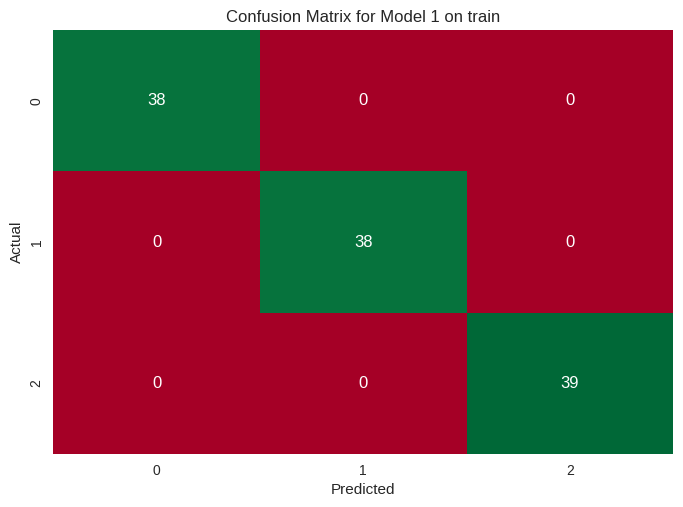

In [30]:
from sklearn.metrics import confusion_matrix

pred1 = dtree1.predict(X_train)
cm1 = confusion_matrix(y_train,pred1)

labels = np.unique(y_train)
sns.heatmap(cm1,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Model 1 on train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

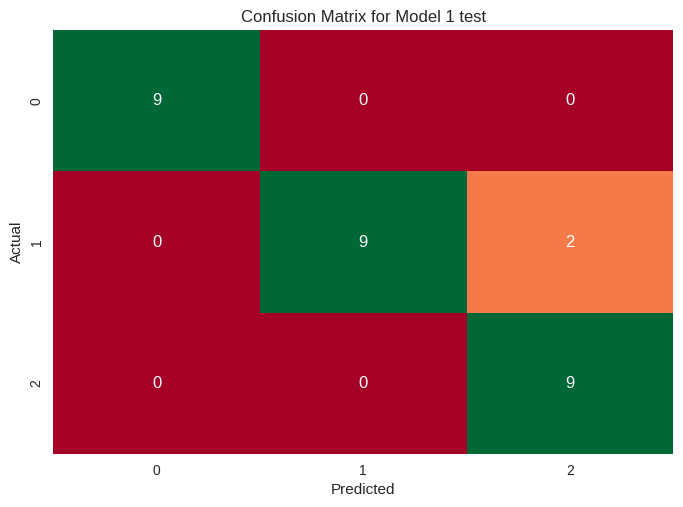

In [31]:
from sklearn.metrics import confusion_matrix

pred1 = dtree1.predict(X_valid)
cm1 = confusion_matrix(y_valid,pred1)

labels = np.unique(y_valid)
sns.heatmap(cm1,annot=True,fmt='d',cmap='RdYlGn'
            ,cbar=False,xticklabels=labels
            ,yticklabels=labels)
plt.title("Confusion Matrix for Model 1 test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(dtree1, X_valid, y_valid, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.83333333 1.         1.         0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


Sensitivity / True Positive Rate / Recall

In [33]:
from sklearn.metrics import classification_report 

print(classification_report(y_valid,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.82      0.90        11
           2       0.82      1.00      0.90         9

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



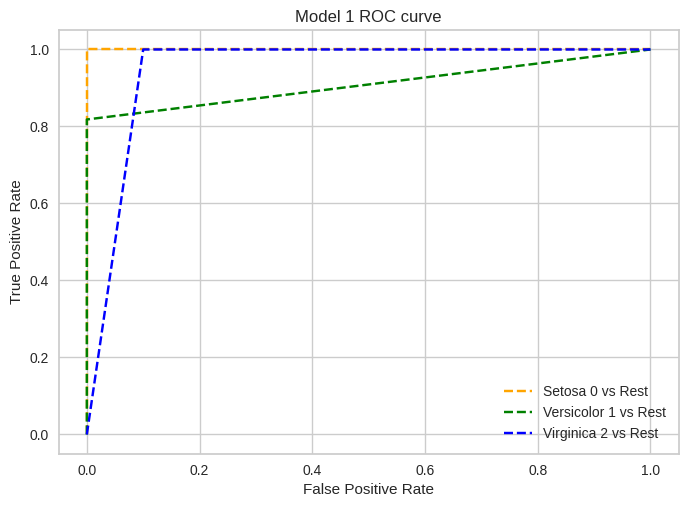

In [34]:
from sklearn.metrics import roc_curve

pred_prob1 = dtree1.predict_proba(X_valid)

fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve((y_valid == i).astype(int), pred_prob1[:, i])

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', color='orange', label='Setosa 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', color='green', label='Versicolor 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', color='blue', label='Virginica 2 vs Rest')
plt.title('Model 1 ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best') 
plt.show()

  

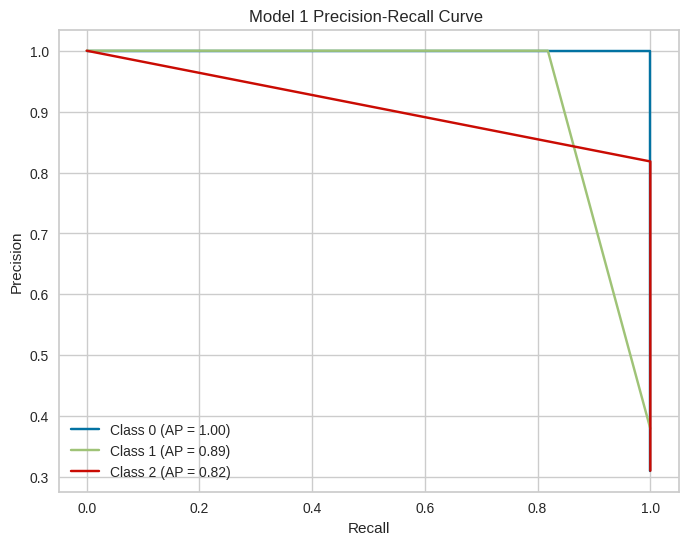

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming y_valid is your true labels and pred_prob1 is the predicted probabilities
# Convert y_valid to one-hot encoding
y_valid_bin = label_binarize(y_valid, classes=dtree1.classes_)

# Initialize variables for precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Calculate precision and recall for each class
for i in range(len(dtree1.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_valid_bin[:, i], pred_prob1[:, i])
    average_precision[i] = average_precision_score(y_valid_bin[:, i], pred_prob1[:, i])

# Plot the precision-recall curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(dtree1.classes_)):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Model 1 Precision-Recall Curve ')
plt.legend(loc='best')
plt.show()


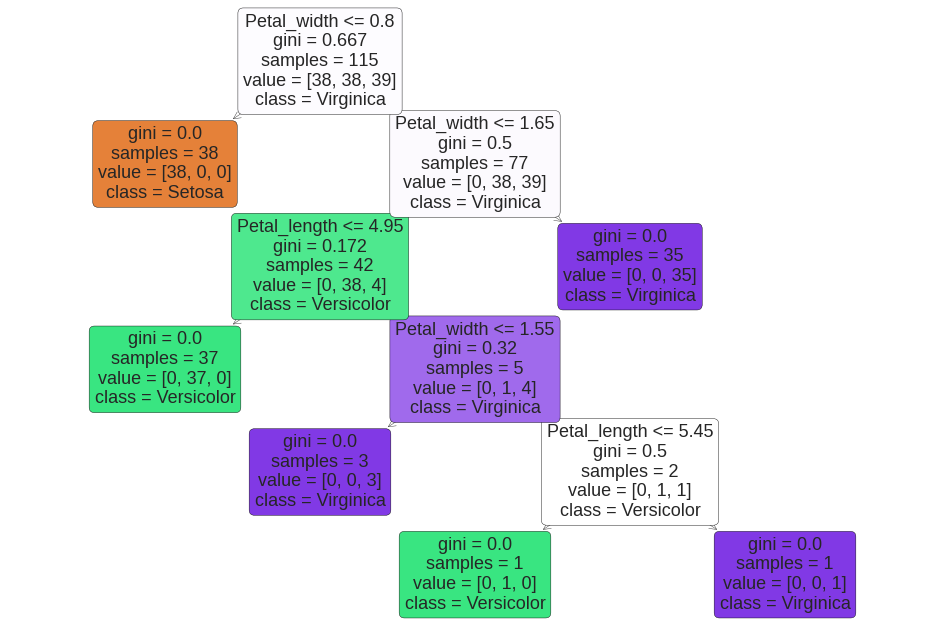

In [36]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtree1, filled=True, 
          feature_names=features, 
          class_names=target_names,
            rounded=True)
plt.show()

## Model 2 Finding Best Parameters Manually

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Get the default parameters
default_params = clf.get_params()

# Print the default parameters
for param, value in default_params.items():
    print(f"{param}: {value}")


ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
random_state: None
splitter: best


- ccp_alpha: Any float value (e.g., 0.0, 0.1, 0.5).

- class_weight: None or a dictionary specifying class weights (e.g., None, 'balanced', {0: 1, 1: 2}).

- criterion: 'gini' or 'entropy'.

- max_depth: None or an integer specifying the maximum depth of the tree.

- max_features: None, 'auto', 'sqrt', 'log2', or an integer specifying the maximum number of features to consider for splitting.

- max_leaf_nodes: None or an integer specifying the maximum number of leaf nodes.

- min_impurity_decrease: Any float value (e.g., 0.0, 0.1, 0.5).

- min_samples_leaf: An integer specifying the minimum number of samples required to be at a leaf node.

- min_samples_split: An integer specifying the minimum number of samples required to split an internal node.

- min_weight_fraction_leaf: Any float value (e.g., 0.0, 0.1, 0.5).

- random_state: None or an integer for reproducibility.
splitter: 'best' or 'random'.

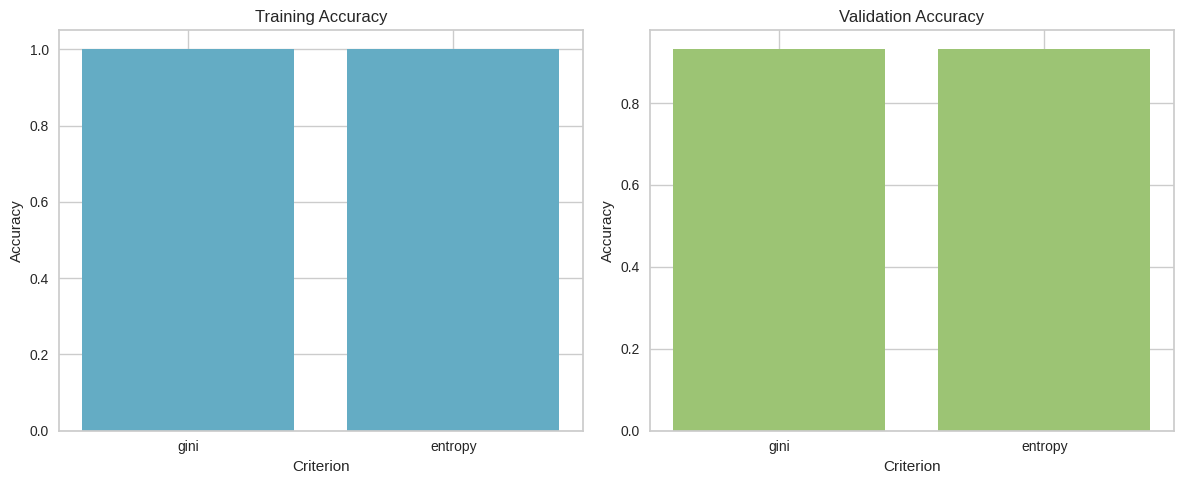

In [79]:
# criterion parameter
train = []
validation = []
array = ['gini', 'entropy']
for criterion in array:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    train.append(clf.score(X_train, y_train))
    validation.append(clf.score(X_valid, y_valid))

frame = pd.DataFrame({'criterion': array, 'train_accuracy': train, 'valid_accuracy': validation})

# Create separate bar plots for training and validation accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for Training Accuracy
axes[0].bar(frame['criterion'], frame['train_accuracy'], color='#64acc4')
axes[0].set_title('Training Accuracy')
axes[0].set_xlabel('Criterion')
axes[0].set_ylabel('Accuracy')

# Plot for Validation Accuracy
axes[1].bar(frame['criterion'], frame['valid_accuracy'], color='#9cc474')
axes[1].set_title('Validation Accuracy')
axes[1].set_xlabel('Criterion')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


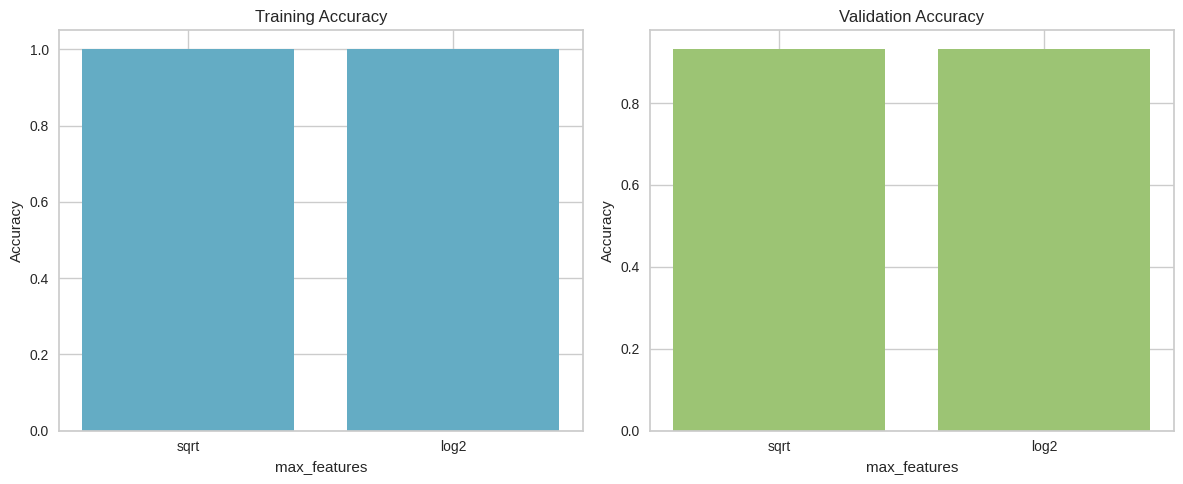

In [84]:
# max_features parameter
train = []
validation = []
array = ['sqrt', 'log2']  # You can customize this list based on your preferences

for arr in array:
    clf = DecisionTreeClassifier(max_features=arr, random_state=42)
    clf.fit(X_train, y_train)
    train.append(clf.score(X_train, y_train))
    validation.append(clf.score(X_valid, y_valid))

frame = pd.DataFrame({'max_features': array, 'train_accuracy': train, 'valid_accuracy': validation})

# Create separate bar plots for training and validation accuracy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for Training Accuracy
axes[0].bar(frame['max_features'], frame['train_accuracy'], color='#64acc4')
axes[0].set_title('Training Accuracy')
axes[0].set_xlabel('max_features')
axes[0].set_ylabel('Accuracy')

# Plot for Validation Accuracy
axes[1].bar(frame['max_features'], frame['valid_accuracy'], color='#9cc474')
axes[1].set_title('Validation Accuracy')
axes[1].set_xlabel('max_features')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


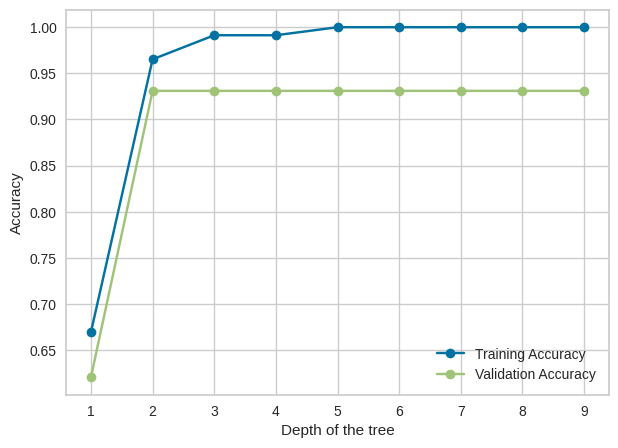

In [70]:
# max_depth parameter
train = []
validation = []
for arr in range(1,10):
    clf = DecisionTreeClassifier(max_depth = arr,random_state=42)
    clf.fit(X_train,y_train)
    train.append(clf.score(X_train,y_train))
    validation.append(clf.score(X_valid,y_valid))

frame = pd.DataFrame({'max_depth':range(1,10),'train_accuracy':train,'valid_accuracy':validation})
plt.figure(figsize=(7,5))
plt.plot(frame['max_depth'], frame['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(frame['max_depth'], frame['valid_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Depth of the tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

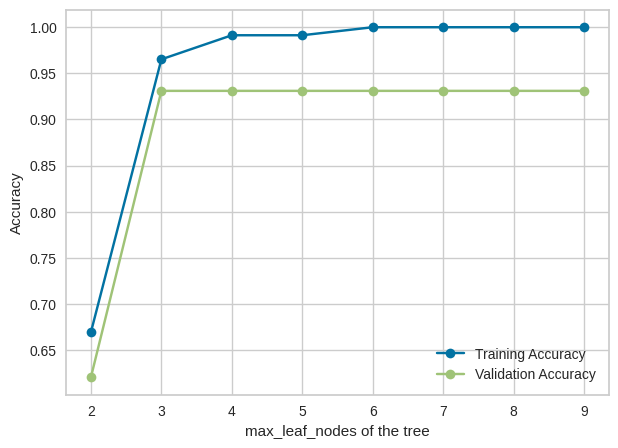

In [69]:
# max_leaf_nodes parameter
train = []
validation = []
for arr in range(2,10):
    clf = DecisionTreeClassifier(max_leaf_nodes = arr,random_state=42)
    clf.fit(X_train,y_train)
    train.append(clf.score(X_train,y_train))
    validation.append(clf.score(X_valid,y_valid))

frame = pd.DataFrame({'max_leaf_nodes':range(2,10),'train_accuracy':train,'valid_accuracy':validation})
plt.figure(figsize=(7,5))
plt.plot(frame['max_leaf_nodes'], frame['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(frame['max_leaf_nodes'], frame['valid_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('max_leaf_nodes of the tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

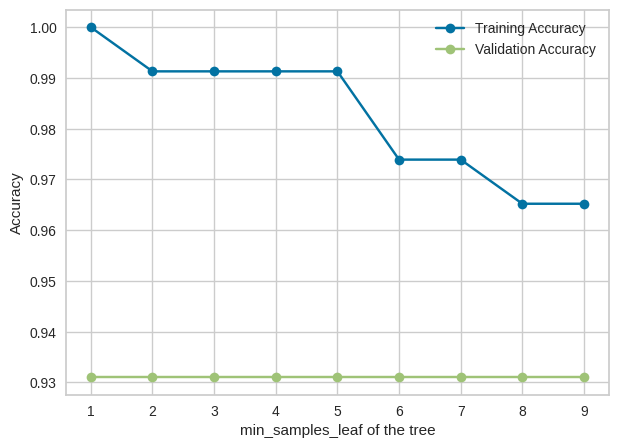

In [71]:
# min_samples_leaf parameter
train = []
validation = []
for arr in range(1,10):
    clf = DecisionTreeClassifier(min_samples_leaf = arr,random_state=42)
    clf.fit(X_train,y_train)
    train.append(clf.score(X_train,y_train))
    validation.append(clf.score(X_valid,y_valid))

frame = pd.DataFrame({'min_samples_leaf':range(1,10),'train_accuracy':train,'valid_accuracy':validation})
plt.figure(figsize=(7,5))
plt.plot(frame['min_samples_leaf'], frame['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(frame['min_samples_leaf'], frame['valid_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('min_samples_leaf of the tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

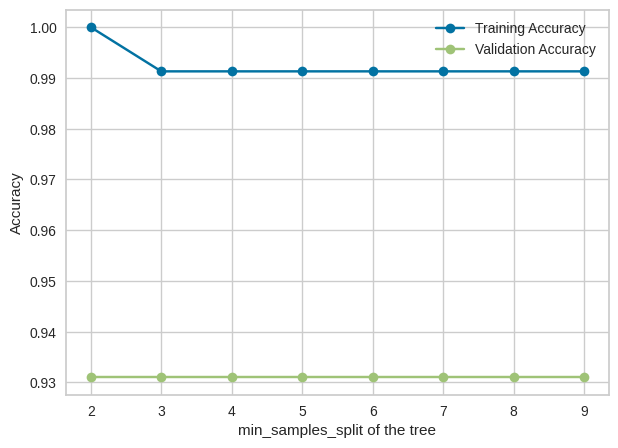

In [73]:
# min_samples_split parameter
train = []
validation = []
for arr in range(2,10):
    clf = DecisionTreeClassifier(min_samples_split = arr,random_state=42)
    clf.fit(X_train,y_train)
    train.append(clf.score(X_train,y_train))
    validation.append(clf.score(X_valid,y_valid))

frame = pd.DataFrame({'min_samples_split':range(2,10),'train_accuracy':train,'valid_accuracy':validation})
plt.figure(figsize=(7,5))
plt.plot(frame['min_samples_split'], frame['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(frame['min_samples_split'], frame['valid_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('min_samples_split of the tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

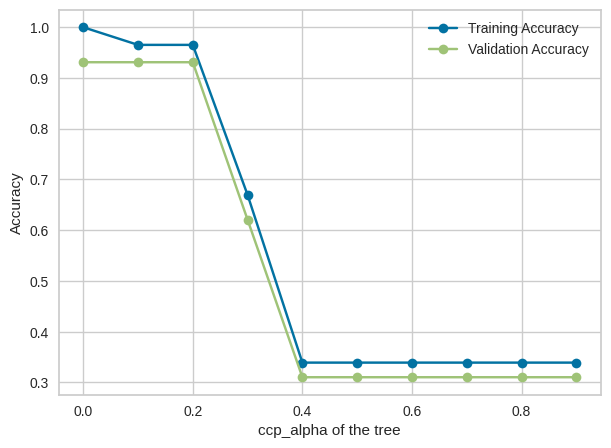

In [65]:
# ccp_alpha parameter
train = []
validation = []
array = np.arange(0.0,1.0, 0.1)
for arr in array:
    clf = DecisionTreeClassifier(ccp_alpha=arr,random_state=42)
    clf.fit(X_train,y_train)
    train.append(clf.score(X_train,y_train))
    validation.append(clf.score(X_valid,y_valid))

frame = pd.DataFrame({'ccp_alpha': array, 'train_accuracy': train, 'valid_accuracy': validation})
plt.figure(figsize=(7,5))
plt.plot(frame['ccp_alpha'], frame['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(frame['ccp_alpha'], frame['valid_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('ccp_alpha of the tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

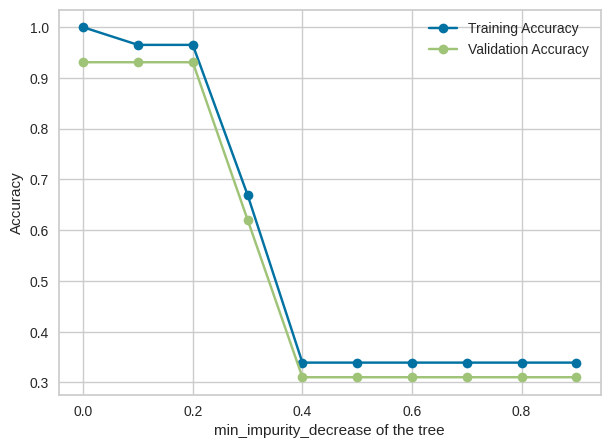

In [64]:
# min_impurity_decrease parameter
array = np.arange(0.0, 1.0, 0.1)
train = []
validation = []

for arr in array:
    clf = DecisionTreeClassifier(min_impurity_decrease=arr, random_state=42)
    clf.fit(X_train, y_train)
    train.append(clf.score(X_train, y_train))
    validation.append(clf.score(X_valid, y_valid))

frame = pd.DataFrame({'min_impurity_decrease': array, 'train_accuracy': train, 'valid_accuracy': validation})

plt.figure(figsize=(7, 5))
plt.plot(frame['min_impurity_decrease'], frame['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(frame['min_impurity_decrease'], frame['valid_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('min_impurity_decrease of the tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

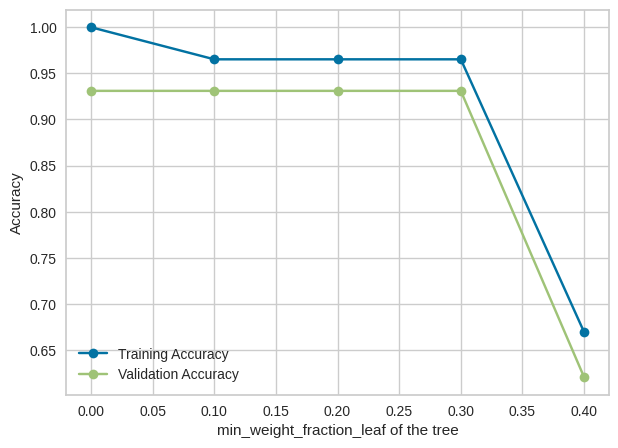

In [63]:
# min_weight_fraction_leaf parameter
array = np.arange(0.0, 0.5, 0.1)

train = []
validation = []

for arr in array:
    clf = DecisionTreeClassifier(min_weight_fraction_leaf=arr, random_state=42)
    clf.fit(X_train, y_train)
    train.append(clf.score(X_train, y_train))
    validation.append(clf.score(X_valid, y_valid))

frame = pd.DataFrame({'min_weight_fraction_leaf': array, 'train_accuracy': train, 'valid_accuracy': validation})

plt.figure(figsize=(7, 5))
plt.plot(frame['min_weight_fraction_leaf'], frame['train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(frame['min_weight_fraction_leaf'], frame['valid_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('min_weight_fraction_leaf of the tree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
from sklearn.tree import DecisionTreeClassifier
dtree2 = DecisionTreeClassifier(max_depth=2,max_leaf_nodes=2,
                       min_samples_leaf=1,min_samples_split=2,
                       ccp_alpha=0.2,min_impurity_decrease=0.2,
                       min_weight_fraction_leaf=0.30,random_state=42)
dtree2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.2, max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.2, min_weight_fraction_leaf=0.3,
                       random_state=42)

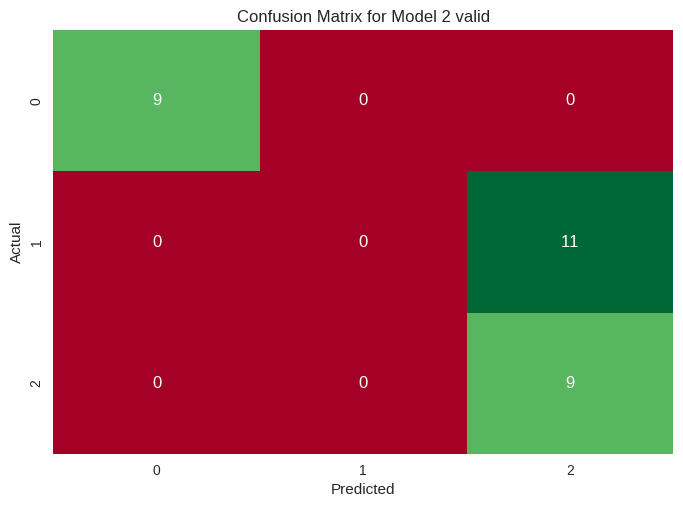

In [104]:
from sklearn.metrics import confusion_matrix

pred2 = dtree2.predict(X_valid)
cm1 = confusion_matrix(y_valid,pred2)

labels = np.unique(y_valid)
sns.heatmap(cm1,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Model 2 valid")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(dtree2, X_valid, y_valid, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.66666667 0.66666667 0.66666667 0.66666667 0.6       ]
Mean Accuracy: 0.6533333333333333


## Model 3 Best parameter using Grid-Search

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 0.5],
    'random_state': [42],
}

dtree3 = DecisionTreeClassifier()

grid_search = GridSearchCV(dtree3,
                           param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42, 'splitter': 'best'}


In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(grid_search, X_valid, y_valid, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.83333333 1.         1.         0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


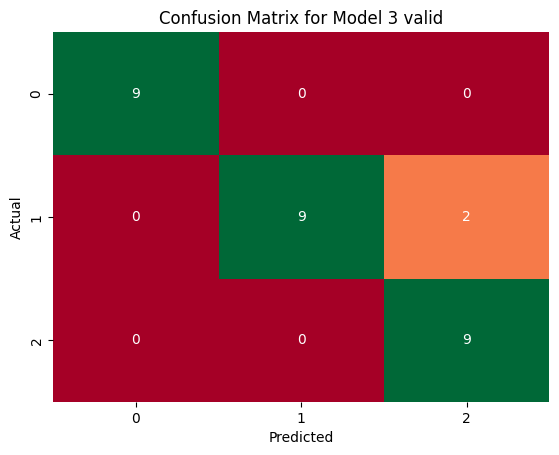

In [10]:
from sklearn.metrics import confusion_matrix

pred3 = grid_search.predict(X_valid)
cm3 = confusion_matrix(y_valid,pred3)

labels = np.unique(y_valid)
sns.heatmap(cm3,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Model 3 valid")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model 4 Bagging

In [106]:
from sklearn.ensemble import BaggingClassifier

# Create a decision tree classifier
base_classifier = DecisionTreeClassifier()

# Create a bagging classifier with 10 base classifiers (you can adjust this number)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(bagging_classifier, X_valid, y_valid, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.83333333 1.         1.         0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


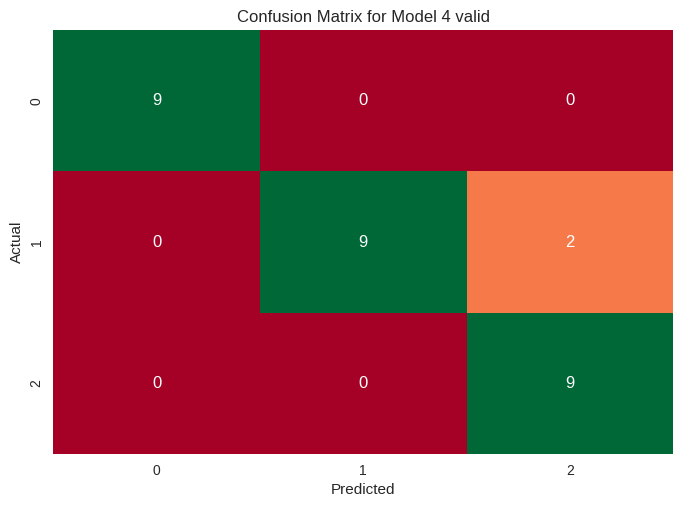

In [108]:
from sklearn.metrics import confusion_matrix

pred4 = bagging_classifier.predict(X_valid)
cm4 = confusion_matrix(y_valid,pred3)

labels = np.unique(y_valid)
sns.heatmap(cm4,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Model 4 valid")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model 5 Ada Boost

In [128]:
from sklearn.ensemble import AdaBoostClassifier

# Create a decision tree classifier as the base learner
base_classifier = DecisionTreeClassifier(max_depth=1)  # Use a shallow tree as a weak learner

# Create an AdaBoost classifier with 50 base classifiers (you can adjust this number)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [129]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(adaboost_classifier, X_valid, y_valid, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.83333333 1.         1.         0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


## Model 6 Voting

In [132]:
from sklearn.ensemble import VotingClassifier

# Create individual decision tree classifiers
classifier1 = DecisionTreeClassifier(max_depth=1)
classifier2 = DecisionTreeClassifier(max_depth=5)
classifier3 = DecisionTreeClassifier(max_depth=10)

# Create a VotingClassifier with decision tree classifiers
voting_classifier = VotingClassifier(
    estimators=[
        ('dt1', classifier1),
        ('dt2', classifier2),
        ('dt3', classifier3)
    ],
    voting='hard'  # Change to 'soft' for soft voting
)

# Train the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier(max_depth=1)),
                             ('dt2', DecisionTreeClassifier(max_depth=5)),
                             ('dt3', DecisionTreeClassifier(max_depth=10))])

In [133]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(voting_classifier, X_valid, y_valid, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.83333333 1.         1.         0.83333333 1.        ]
Mean Accuracy: 0.9333333333333333


## Model 7 Cost complexity Pruning

In [139]:
from sklearn.tree import DecisionTreeClassifier

path = dtree1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


clfs = []
for ccp_alpha in ccp_alphas:
    clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf2.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 11 with ccp_alpha: 0.33189011366705135


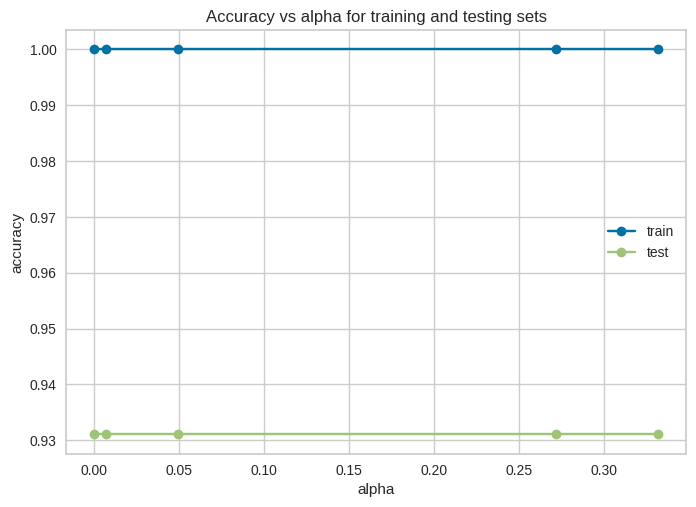

In [140]:

train_scores = [clf2.score(X_train, y_train) for clf2 in clfs]
test_scores = [clf2.score(X_valid, y_valid) for clf2 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Prototype webapp

In [145]:
test_data = pd.read_csv('depolytest.csv')
test_data

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.0,3.3,1.4,0.2,Setosa
1,5.6,3.0,4.5,1.5,Versicolor
2,4.9,2.5,4.5,1.7,Virginica


In [150]:
import pandas as pd

# Get user input for feature values
sl, sw, pl, pw = map(float, input('Enter the features values (comma-separated): ').split(','))

# Create a DataFrame with the input values
input_data = pd.DataFrame({'Sepal_length': [sl], 'Sepal_width': [sw], 'Petal_length': [pl], 'Petal_width': [pw]})

# Predict using the trained model
predicted_class = dtree1.predict(input_data)


# Print the user input and predicted class
print(f"User Input: {input_data}")
if predicted_class == 0:
    print('Setosa')
elif predicted_class == 1:
    print('Versicolor')
else:
    print('Virginica')


User Input:    Sepal_length  Sepal_width  Petal_length  Petal_width
0           5.0          3.3           1.4          0.2
Setosa


## Model Exporting

In [11]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(dtree1, model_file)